# Задание
Среди клиентов туристической фирмы 32% ездили в Турцию, 18% — в
Египет, 10% — в Турцию и Египет. Найти вероятность того, что случайно выбранный клиент ездил в Турцию или Египет.

# Решение

Для решения задачи методом "дерево вероятностей" в Jupyter Notebook необходимо:

1. Построить дерево вероятностей.

Мы знаем вероятности клиентов, для Турции - 0.32 и для Египта - 0.18. Но у этих клиентов есть пересечение в виде тех кто был и в Турции и в Египте - 0.1.
Значит нам нужно выделить 4 группы:
    
  - Были только в Турции = 0.32 - 0.1 = 0.22
  - Были только в Египте = 0.18 - 0.1 = 0.08
  - Были и в Египте и в Турции = 0.1
  - Не были в Турции или в Египте = 1 - 0.22 - 0.08 - 0.1 = 0.6

2. Найти вероятность того, что случайный ислучайно выбранный клиент ездил в Турцию или Египет.

3. Построить дерево вероятностей с помощью графических инструментов библиотеки matplotlib.

Полная вероятность того, что случайно выбранный клиент ездил в Турцию или Египет: 0.4000


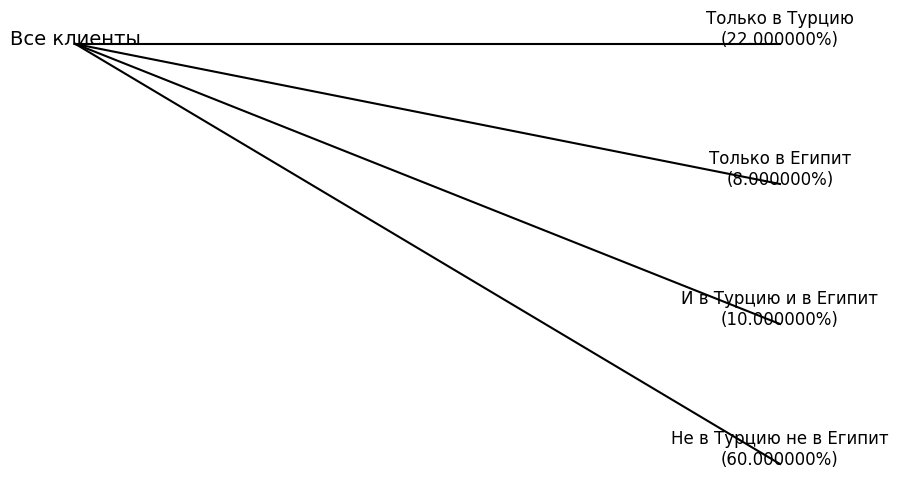

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Вероятности
P_T = 0.32    # Вероятность того, что случайный клиент ездил в Турцию
P_E = 0.18    # Вероятность того, что случайный клиент ездил в Египет
P_TAE = 0.10    # Вероятность того, что случайный клиент ездил в Турцию и Египет

# Формула полной вероятности для успеха
P_TOE = P_T + P_E - P_TAE 

print(f"Полная вероятность того, что случайно выбранный клиент ездил в Турцию или Египет: {P_TOE:.4f}")

# Построение дерева вероятностей
fig, ax = plt.subplots(figsize=(10, 6))

# Дерево вероятностей
# Первый уровень
ax.text(0.1, 0.9, 'Все клиенты', fontsize=14, ha='center')

# Второй уровень
ax.text(0.3, 0.9, f'Только в Турцию\n({(P_T - P_TAE):%})', fontsize=12, ha='center')
ax.text(0.3, 0.7, f'Только в Египит\n({(P_E - P_TAE):%})', fontsize=12, ha='center')
ax.text(0.3, 0.5, f'И в Турцию и в Египит\n({(P_TAE):%})', fontsize=12, ha='center')
ax.text(0.3, 0.3, f'Не в Турцию не в Египит\n({(1 - P_T - P_E + P_TAE):%})', fontsize=12, ha='center')

# Соединительные линии
ax.plot([0.1, 0.3], [0.9, 0.9], 'k-')
ax.plot([0.1, 0.3], [0.9, 0.7], 'k-')
ax.plot([0.1, 0.3], [0.9, 0.5], 'k-')
ax.plot([0.1, 0.3], [0.9, 0.3], 'k-')


ax.axis('off')
plt.show()


# Задание

У клиентов обращаются в М фирм равновероятно. Найти вероятность
того, что во все фирмы обратятся разное число клиентов (включая,
возможно, ноль), если 

1. N = 6, М = 3; 
2. N = 7, М = 3; 
3. N = 7, М= 4.

# Решение
Пусть Y — количество клиентов, M — количество фирм. Вероятность того, что хотя бы один бассейн останется пустым, можно найти следующим образом:
1.	Определим общее количество вариантов, как можно распределить N клиентов по M фирмам = M^N
2.	Поссчитаем колличество перестановок чисел от 0 до N-1 размером M, которые в сумме дают N. Данное колличество поделим на колличество всех вариантов и получим искомую вероятность

Рассмотрим каждый из случаев.


Случай a: N = 6, M = 3, вероятность = 0.0247
Случай b: N = 7, M = 3, вероятность = 0.0110
Случай c: N = 7, M = 4, вероятность = 0.0015


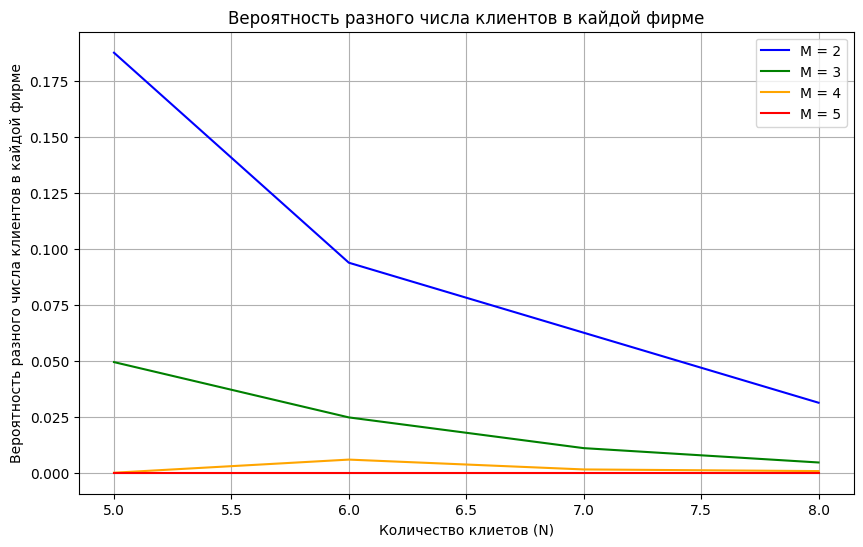

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb
from itertools import permutations


def solution(clients_count, to_pick_count):
    if clients_count < to_pick_count:
        return 0
    
    # print(clients_count, end=' ')
    # print(to_pick_count)

    # Возможные числа клиентов в каждой фирме: от 0 до N и чтобы в сумме было == N
    all_distributions = permutations(range(clients_count+1), to_pick_count)
    valid_distributions = [distribution for distribution in all_distributions if sum(distribution) == clients_count]
    
    ans_count = len(valid_distributions)
    
    total_count = to_pick_count ** clients_count
    
    probability = ans_count / total_count
    return probability

map = {
    'N': 'clients_count', # кол-во клиентов 
    'M': 'to_pick_count', # кол-во фирм
}

params = [
    {'N': 6, 'M': 3}, 
    {'N': 7, 'M': 3}, 
    {'N': 7, 'M': 4}, 
]

probabilities = [
    solution(
        **{map[k]: v for k, v in param_map.items()}
    ) for param_map in params
]

# Выведем результаты
for i, param in enumerate(params):
    print(f"Случай {chr(97 + i)}: N = {param['N']}, M = {param['M']}, вероятность = {probabilities[i]:.4f}")

# Визуализация вероятностей для различных N и M
N_s = [param['N'] for param in params]
M_s = [param['M'] for param in params]

N_vals = range(min(N_s) - 1, max(N_s) + 1 + 1)
M_vals = range(min(M_s) - 1, max(M_s) + 1 + 1)
colors = ['blue', 'green', 'orange', 'red']

plt.figure(figsize=(10, 6))
for i, M in enumerate(M_vals):
    probabilities = [
        solution(**{
            map['N']: N,
            map['M']: M,
        }) for N in N_vals
    ]
    plt.plot(
        N_vals, 
        probabilities, 
        label=f'M = {M}', 
        color=colors[i % len(colors)]
    )

plt.xlabel('Количество клиетов (N)')
plt.ylabel('Вероятность разного числа клиентов в кайдой фирме')
plt.title('Вероятность разного числа клиентов в кайдой фирме')
plt.legend()
plt.grid(True)
plt.show()
